# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Pandas: Funciones rolling y operaciones con DataFrames

En este notebook trabajaremos sobre los mismos datos que la introducción a pandas. Veremos como usar el método rolling para obtener resultados como la media móvil, la desviación típica móvil... Además veremos como agrupar los datos usando `groupby` y cómo pivotar tablas.

In [1]:
%matplotlib inline
import pandas as pd

## Cargando los datos

Trabajaremos sobre un fichero de datos metereológicos de la Consejeria Agricultura, Pesca y Desarrollo Rural de Andalucía.

In [2]:
# preserve
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

Vemos que pinta tiene el fichero:

In [3]:
# en Linux
# !head ../data/tabernas_meteo_data.txt

In [4]:
# en Windows
# !more ..\data\tabernas_meteo_data.txt

Tenemos que hacer los siguientes cambios:
* Separar los campos por un número arbitrario de espacios en blanco
* Saltar las primeras lineas.
* Dar nombre a las nuevas columnas.
* Descartar columna del día del año (no nos interesa).
* Convertir las fechas al formato correcto.

In [5]:
# leo con el formato adecuado
data = pd.read_csv(
    "../data/tabernas_meteo_data.txt",
    delim_whitespace=True,
    #sep ='\s+',
    usecols=(0, 2, 3, 4, 5),
    skiprows=2,            
    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates=['DATE'],
    dayfirst=True,  
    # date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%Y'), # parseo manual   
    index_col=['DATE']
    )

data.head(5)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2
2016-12-09,13.6,9.5,11.2,1.8


<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

In [6]:
data.sort_index(inplace=True)

### Funciones "rolling" 

Ya sabemos obtener representaciones gráficas de nuestros de datos. Visualicemos, por ejemplo, la evolución de la temperatura media a lo lardo de los años 2014 y 2015:

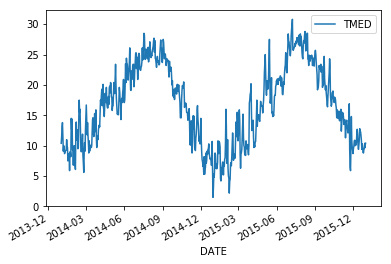

In [7]:
data.loc['2014-01-01':'2015-12-31'].plot(y='TMED')

Se puede apreciar la oscilación a lo largo del año. Sin embargo, las variaciones locales de temperatura de determinados días "ensucian" nuestra representación. Una opción es "suavizar" la curva utilizando una media móvil

Pandas proporciona métodos para calcular magnitudes como medias móviles usando el método `rolling`:

In [8]:
# Calcular la media de la columna TMEAD
data.TMED.head(15)

DATE
2004-01-01    11.1
2004-01-02    10.6
2004-01-03     7.9
2004-01-04     7.2
2004-01-05     7.1
2004-01-06     NaN
2004-01-07     8.3
2004-01-08    13.0
2004-01-09    14.0
2004-01-10    12.2
2004-01-11    12.5
2004-01-12    11.3
2004-01-13    10.9
2004-01-14    11.0
2004-01-15     9.0
Name: TMED, dtype: float64

In [9]:
# Media centrada (semanal/mensual/trimestral)
data.TMED.rolling(7, center=True).mean().head(15)

DATE
2004-01-01          NaN
2004-01-02          NaN
2004-01-03          NaN
2004-01-04          NaN
2004-01-05          NaN
2004-01-06          NaN
2004-01-07          NaN
2004-01-08          NaN
2004-01-09          NaN
2004-01-10    11.742857
2004-01-11    12.128571
2004-01-12    11.557143
2004-01-13    10.900000
2004-01-14    10.528571
2004-01-15     9.928571
Name: TMED, dtype: float64

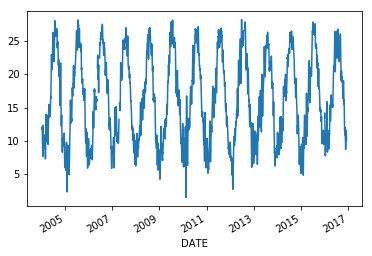

In [10]:
# Media centrada (semanal/mensual/trimestral)
data.TMED.rolling(7, center=True).mean().plot()

### Creación de nuevas columnas 

In [11]:
# Agruparemos por año y día: creemos dos columnas nuevas
data['year'] = data.index.year
data['month'] = data.index.month

## Creando agrupaciones 

En muchas ocasiones queremos realizar agrupaciones de datos en base a determinados valores como son fechas, o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar).

En este caso, imaginemos que nos interesa obtener una representación del "mes típico" o "día típico"

Podemos agrupar nuestros datos utilizando `groupby`:

In [12]:
# Creamos la agrupación
monthly = data.groupby(by=['year', 'month'])

In [13]:
# Podemos ver los grupos que se han creado
monthly.groups.keys()

dict_keys([(2004, 1), (2004, 2), (2004, 3), (2004, 4), (2004, 5), (2004, 6), (2004, 7), (2004, 8), (2004, 9), (2004, 10), (2004, 11), (2004, 12), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2005, 5), (2005, 6), (2005, 7), (2005, 8), (2005, 9), (2005, 10), (2005, 11), (2005, 12), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2006, 5), (2006, 6), (2006, 7), (2006, 8), (2006, 9), (2006, 10), (2006, 11), (2006, 12), (2007, 1), (2007, 2), (2007, 3), (2007, 4), (2007, 5), (2007, 6), (2007, 7), (2007, 8), (2007, 9), (2007, 10), (2007, 11), (2007, 12), (2008, 1), (2008, 2), (2008, 3), (2008, 4), (2008, 5), (2008, 6), (2008, 7), (2008, 8), (2008, 9), (2008, 10), (2008, 11), (2008, 12), (2009, 1), (2009, 2), (2009, 3), (2009, 4), (2009, 5), (2009, 6), (2009, 7), (2009, 8), (2009, 9), (2009, 10), (2009, 11), (2009, 12), (2010, 1), (2010, 2), (2010, 3), (2010, 4), (2010, 5), (2010, 6), (2010, 7), (2010, 8), (2010, 9), (2010, 10), (2010, 11), (2010, 12), (2011, 1), (2011, 2), (2011, 3), (2011, 4), 

Con estos grupos podemos hacer hacer varias cosas:

* Acceder a sus datos individualmente (por ejemplo, comprobar qué pasó cada día de marzo de 2016) 
* Realizar una reducción de datos, para comparar diversos grupos (por, ejemplo caracterizar el tiempo de cada mes a lo largo de los años)

In [14]:
# Accedemos a un grupo
monthly.get_group((2016,3)).head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [15]:
# Hhacemos una agregación de los datos:
monthly_mean = monthly.mean()
monthly_mean.head(24)

TMAX       TMIN       TMED    PRECIP
year month                                           
2004 1      17.603333   3.533333  10.003333  0.026667
     2      16.017241   4.672414   9.803448  0.531034
     3      17.074194   6.187097  11.370968  2.619355
     4      19.016667   7.043333  13.190000  3.233333
     5      21.283871  10.519355  15.883871  1.019355
     6      30.756667  15.916667  23.323333  0.206667
     7      31.664516  17.912903  24.758065  0.006452
     8      33.483871  19.003226  26.241935  0.000000
     9      30.066667  16.323333  22.656667  0.020000
     10     26.022581  11.600000  18.451613  0.122581
     11     18.056667   4.766667  10.920000  0.366667
     12     14.500000   3.790323   8.800000  1.606452
2005 1      14.587097  -0.067742   6.425806  0.090323
     2      12.728571   0.775000   6.746429  1.821429
     3      17.635484   5.574194  11.332258  0.858065
     4      21.910000   8.163333  15.043333  0.073333
     5      26.770968  12.035484  19.732258  0.109677
     6      30.710000  15.550000  23.743333  0.033333
     7      33.445161  17.996774  26.206452  0.000000
     8      32.193333  17.976667  24.706667  0.040000
     9      27.803333  14.303333  20.756667  0.553333
     10     23.900000  11.480645  17.235484  0.187097
     11     17.053333   5.550000  10.913333  0.793333
     12     14.856667   2.730000   8.610000  0.306667

### Pivotando tablas

En ocasiones podemos querer ver nuestros datos de forma diferente o necesitamos organizarlos así para utilizar determinadas funciones de `pandas`. Una necesidad típica es la de pivotar una tabla.

    Imagina que queremos acceder a los mismos datos que en el caso anterior, pero que ahora queremos ver los años en las filas y para cada variable (TMAX, TMED...) los calores de cada mes en una columna. ¿Cómo lo harías?

In [16]:
# Dejar los años como índices y ver la media mensual en cada columna
pivoted = monthly_mean.reset_index().pivot(index='year', columns='month')
pivoted

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.603333  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                     ...       PRECIP  \
month         7          8          9          10    ...           3    
year                                                 ...                
2004   31.664516  33.483871  30.066667  26.022581    ...     2.619355   
2005   33.445161  32.193333  27.803333  23.900000    ...     0.858065   
2006   33.900000  31.990323  28.633333  25.483871    ...     0.070968   
2007   32.551613  31.764516  26.806667  21.919355    ...     0.625806   
2008   32.596774  32.380645  27.343333  21.548387    ...     0.464516   
2009   34.964516  32.367742  26.363333  25.945161    ...     1.425806   
2010   33.070968  33.067742  28.726667  23.980645    ...     2.548387   
2011   32.977419  33.687097  28.870000  24.216129    ...     1.012903   
2012   32.880645  35.754545  28.106667  23.506452    ...     0.025806   
2013   31.841935  31.716129  28.016667  26.603226    ...     1.141935   
2014   32.154839  32.645161  29.603333  25.287097    ...     0.122581   
2015   35.174194  32.203226  27.966667  23.664516    ...     1.374194   
2016   32.180645  30.929032  29.016667  24.567742    ...     0.167742   

                                                                             \
month        4         5         6         7         8         9         10   
year                                                                          
2004   3.233333  1.019355  0.206667  0.006452  0.000000  0.020000  0.122581   
2005   0.073333  0.109677  0.033333  0.000000  0.040000  0.553333  0.187097   
2006   1.960000  2.026667  0.351724  0.000000  0.000000  1.720000  0.232258   
2007   1.248276  0.251613  0.000000  0.000000  0.070968  2.133333  2.051613   
2008   0.120000  1.503226  0.093333  0.283871  0.000000  2.146667  3.296774   
2009   0.720000  0.103226  0.020000  0.000000  0.077419  1.306667  0.090323   
2010   0.486667  0.367742  0.853333  0.000000  0.032258  0.146667  0.677419   
2011   0.993333  1.606452  0.080000  0.000000  0.077419  0.573333  0.141935   
2012   0.013333  0.000000  0.006667  0.000000  0.000000  2.233333  0.787097   
2013   0.373333  0.574194  0.000000  0.000000  0.800000  0.673333  0.083871   
2014   0.013333  0.051613  0.580000  0.000000  0.000000  1.240000  0.664516   
2015   1.080000  0.103226  0.113333  0.012903  0.006452  1.160000  1.322581   
2016   0.126667  0.425806  0.006667  0.000000  0.032258  0.313333  0.567742   

                           
month        11        12  
year                       
2004   0.366667  1.606452  
2005   0.793333  0.306667  
2006   1.333333  0.322581  
2007   0.380000  1.280000  
2008   0.646667  0.000000  
2009   0.233333  3.503226  
2010   1.546667  1.877419  
2011   1.293333  0.458065  
2012   2.173333  0.058065  
2013   0.673333  0.683871  
2014   0.6333

La línea anterior no es sencilla y no se escribe de una sola vez sin errores (sobre todo si estás empezando). Esto es una ejemplo de que `pandas` es una librería potente, pero que lleva tiempo aprender. Pasarás muchas horas peleando contra problemas de este tipo, pero afortunadamente mucha gente lo ha pasado mal antes y su experiencia ha quedado plasmada en cientos de **preguntas de `stack overflow`** y en la **documentación de `pandas`**

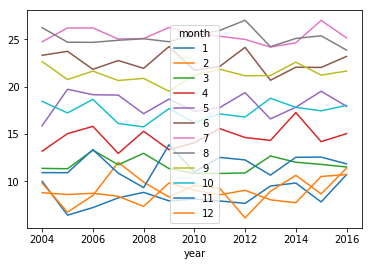

In [17]:
pivoted.TMED.plot()

### Visualizaciones especiales

#### scatter

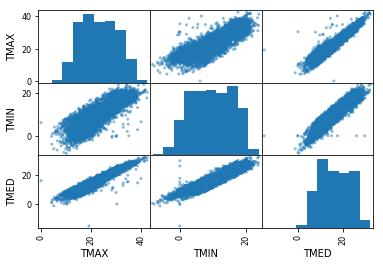

In [18]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

#### lag_plot 

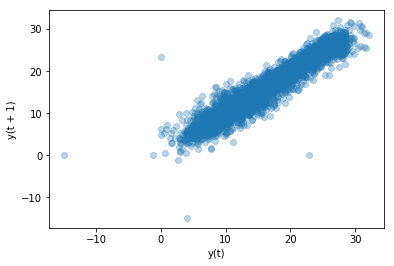

In [19]:
pd.plotting.lag_plot(data.TMED, lag=1, alpha=0.3)

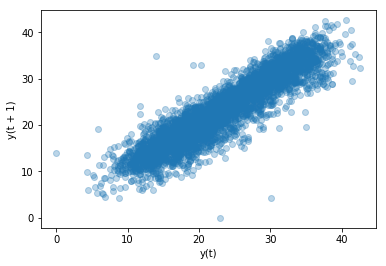

In [20]:
pd.plotting.lag_plot(data.TMAX, lag=1, alpha=0.3)

---

Hemos aprendido:
* A utilizar las funciones rolling
* A agrupar datos de un DataFrame utilizando sus columnas:
  - A agrupar con más de una variable
  - A acceder a distintos grupos
  - A obtener una reducción de datos para cada grupo
* A salvar nuestros datos
* A utilizar algunas representaciones especiales

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [21]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())